# Logistic Regression Using Food Items Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/food-items/food_items.csv


In [2]:
data = pd.read_csv(r"/kaggle/input/food-items/food_items.csv")
data.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'


### Data Exploration

In [3]:
data.shape

(13260, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calories             13260 non-null  float64
 1   Total Fat            13260 non-null  int64  
 2   Saturated Fat        13260 non-null  float64
 3   Monounsaturated Fat  13260 non-null  float64
 4   Polyunsaturated Fat  13260 non-null  float64
 5   Trans Fat            13260 non-null  float64
 6   Cholesterol          13260 non-null  int64  
 7   Sodium               13260 non-null  float64
 8   Total Carbohydrate   13260 non-null  float64
 9   Dietary Fiber        13260 non-null  float64
 10  Sugars               13260 non-null  float64
 11  Sugar Alcohol        13260 non-null  int64  
 12  Protein              13260 non-null  float64
 13  Vitamin A            13260 non-null  int64  
 14  Vitamin C            13260 non-null  int64  
 15  Calcium              13260 non-null 

In [5]:
data.isnull().sum()

Calories               0
Total Fat              0
Saturated Fat          0
Monounsaturated Fat    0
Polyunsaturated Fat    0
Trans Fat              0
Cholesterol            0
Sodium                 0
Total Carbohydrate     0
Dietary Fiber          0
Sugars                 0
Sugar Alcohol          0
Protein                0
Vitamin A              0
Vitamin C              0
Calcium                0
Iron                   0
class                  0
dtype: int64

In [6]:
data.duplicated().sum()

2341

In [7]:
food_df = data.copy()

In [8]:
feature_cols = list(food_df.iloc[:, :-1].columns)
feature_cols

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

In [9]:
food_df.describe()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000
mean,133.861086,4.475264,1.450617,0.338069,0.254660,0.047459,8.857692,241.867142,18.232020,1.602971,6.645234,0.117949,4.661333,6.287632,6.741855,5.175264,5.235671
std,94.227650,5.386340,2.410318,1.345852,2.230586,0.321402,20.976530,272.284363,14.786316,3.363879,8.328465,1.121529,5.611143,18.374191,23.785100,8.779637,9.119459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,135.000000,17.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000
75%,180.000000,7.000000,2.000000,0.000000,0.000000,0.000000,10.000000,370.000000,27.000000,2.000000,11.000000,0.000000,7.000000,6.000000,2.000000,6.000000,8.000000
max,2210.000000,43.000000,22.000000,40.000000,235.000000,11.000000,450.000000,2431.000000,270.000000,305.000000,115.000000,31.000000,70.000000,622.000000,1000.000000,110.000000,170.000000


In [10]:
food_df[food_df.duplicated()]

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
5,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
27,157.0,0,0.0,0.0,0.0,0.0,0,10.0,11.2,0.0,0.0,0,1.2,0,0,0,0,'Less Often'
44,222.0,0,0.0,0.0,0.0,0.0,0,14.0,16.0,0.0,0.0,0,1.7,0,0,0,0,'Less Often'
46,160.0,0,0.0,0.0,0.0,0.0,0,10.0,11.0,0.0,0.0,0,1.2,0,0,0,0,'Less Often'
53,1.0,0,0.0,0.0,0.0,0.0,0,24.0,0.0,0.0,0.0,0,0.0,0,0,0,0,'More Often'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,290.0,5,2.0,0.0,0.0,0.0,10,560.0,50.0,8.0,5.0,0,13.0,8,20,15,20,'In Moderation'
13230,210.0,14,2.0,6.0,8.0,0.0,0,10.0,16.0,3.0,7.0,0,7.0,0,4,6,8,'Less Often'
13245,90.0,2,0.5,0.0,0.0,0.0,0,70.0,17.0,1.0,8.0,0,2.0,0,0,0,2,'In Moderation'
13246,90.0,2,0.5,0.0,0.0,0.0,0,70.0,17.0,1.0,8.0,0,2.0,0,0,0,2,'In Moderation'


In [11]:
food_df[food_df['Calories'] == 110]

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
5,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
11,110.0,0,0.0,0.0,0.0,0.0,0,0.0,6.6,0.0,0.0,0,0.9,0,0,0,0,'In Moderation'
13,110.0,0,0.0,0.0,0.0,0.0,0,0.0,6.5,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
567,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.3,0.0,0.0,0,0.9,0,0,0,0,'In Moderation'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13208,110.0,5,0.5,0.0,0.0,0.0,0,250.0,13.0,5.0,2.0,0,6.0,50,6,4,14,'Less Often'
13210,110.0,5,0.0,0.0,0.0,0.0,0,135.0,14.0,4.0,1.0,0,5.0,0,0,6,8,'Less Often'
13212,110.0,5,0.5,0.0,0.0,0.0,0,250.0,13.0,5.0,2.0,0,6.0,50,6,4,14,'Less Often'
13225,110.0,5,0.0,0.0,0.0,0.0,0,340.0,16.0,1.0,2.0,0,2.0,15,0,2,0,'Less Often'


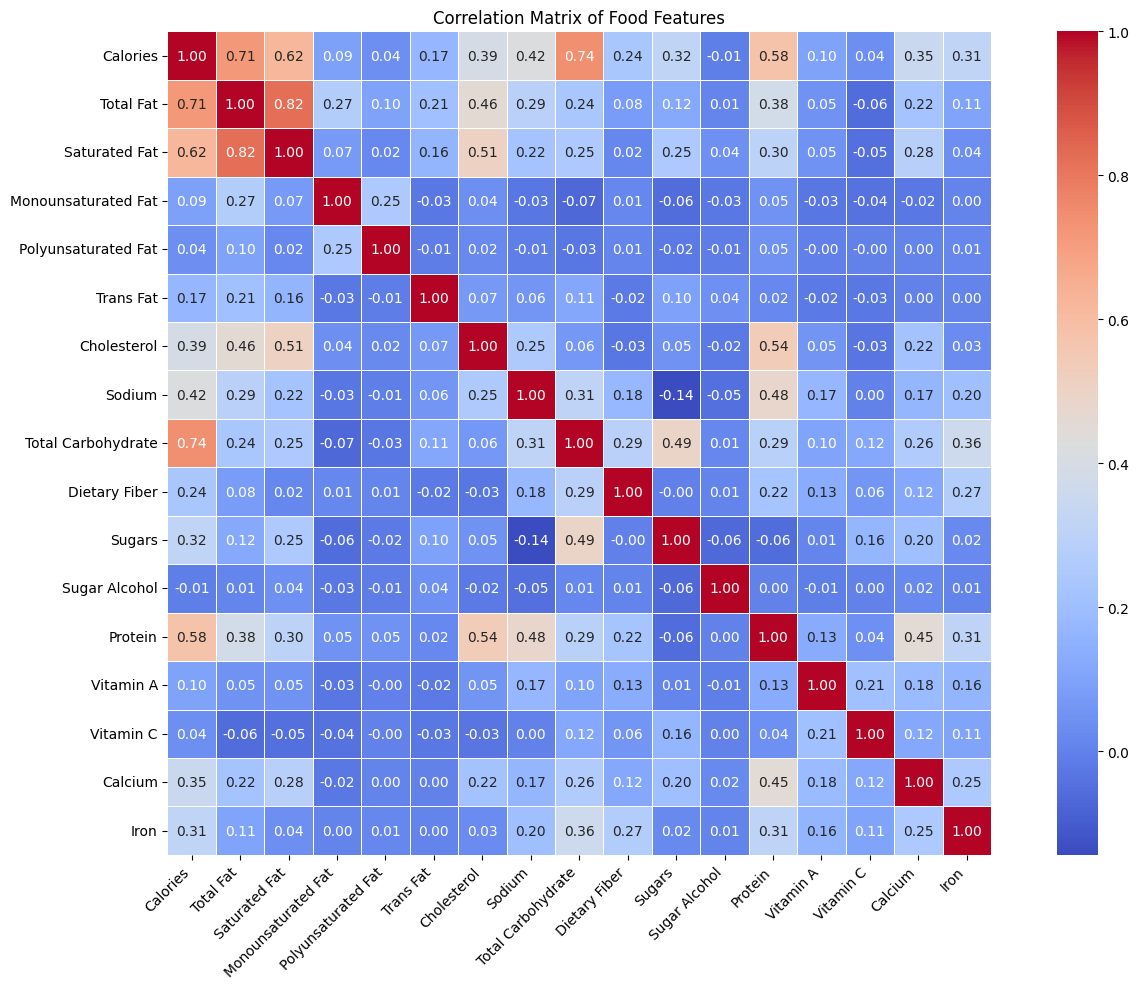

In [12]:
# Correlation Matrix
numeric_df = food_df.drop(columns='class')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Food Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Data Cleaning

### 1. Removing Duplicates

In [13]:
# No.of duplicates
food_duplicates = food_df.duplicated().sum()
print(f"Number of duplicate rows: {food_duplicates}")

Number of duplicate rows: 2341


In [14]:
# Removing duplicates
food_df = food_df.drop_duplicates()
food_df.shape

(10919, 18)

In [15]:
# Resetting index
food_df = food_df.reset_index(drop=True)

In [16]:
food_df.tail(3)

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
10916,140.0,3,0.0,0.0,0.0,0.0,0,130.0,26.0,2.0,15.0,0,1.0,0,0,0,2,'In Moderation'
10917,140.0,3,0.5,0.0,0.0,0.0,0,55.0,27.0,2.0,17.0,0,1.0,0,0,0,2,'In Moderation'
10918,120.0,4,0.5,0.0,0.0,0.0,0,55.0,23.0,2.0,13.0,0,2.0,0,0,0,4,'In Moderation'


In [17]:
food_df['class'].value_counts(normalize=True)

class
'In Moderation'    0.486858
'Less Often'       0.453521
'More Often'       0.059621
Name: proportion, dtype: float64

<Axes: xlabel='class'>

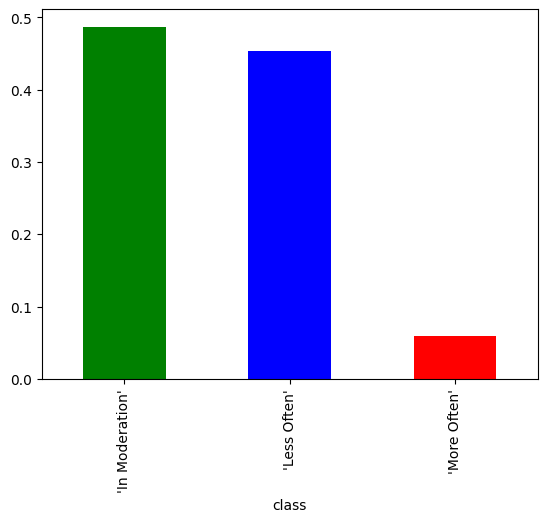

In [18]:
food_df['class'].value_counts(normalize=True).plot.bar(color=['green', 'blue', 'red'])

#### As we can see from the bar chart above, this dataset has three classes: 
- `In Moderation`, `Less Often`, and `More Often`.
-  The three labels are **imbalanced**.
-  For diabetic patients, most food items are in the `In Moderation` and `Less Often` categories. This makes diabetes diet management very hard, so we could build a machine learning model to help patients choose their food.

#### We have three labels meaning our logistic regression model will be multinomial with three classes.

#### `Multinomial logistic regression` model is different from the `one-vs-rest` binary logistic regression. 
- For `one-vs-rest` schema, you need to train an **independent classifier for each class.**
- For example, you need a `More Often` classifier to differentiate a food item between `More Often` and **Not More Often** (or, `In Moderation` and `Less Often`).

# Data Preprocessing

/tmp/ipykernel_13/1354580319.py:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option("mode.use_inf_as_na", True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_n

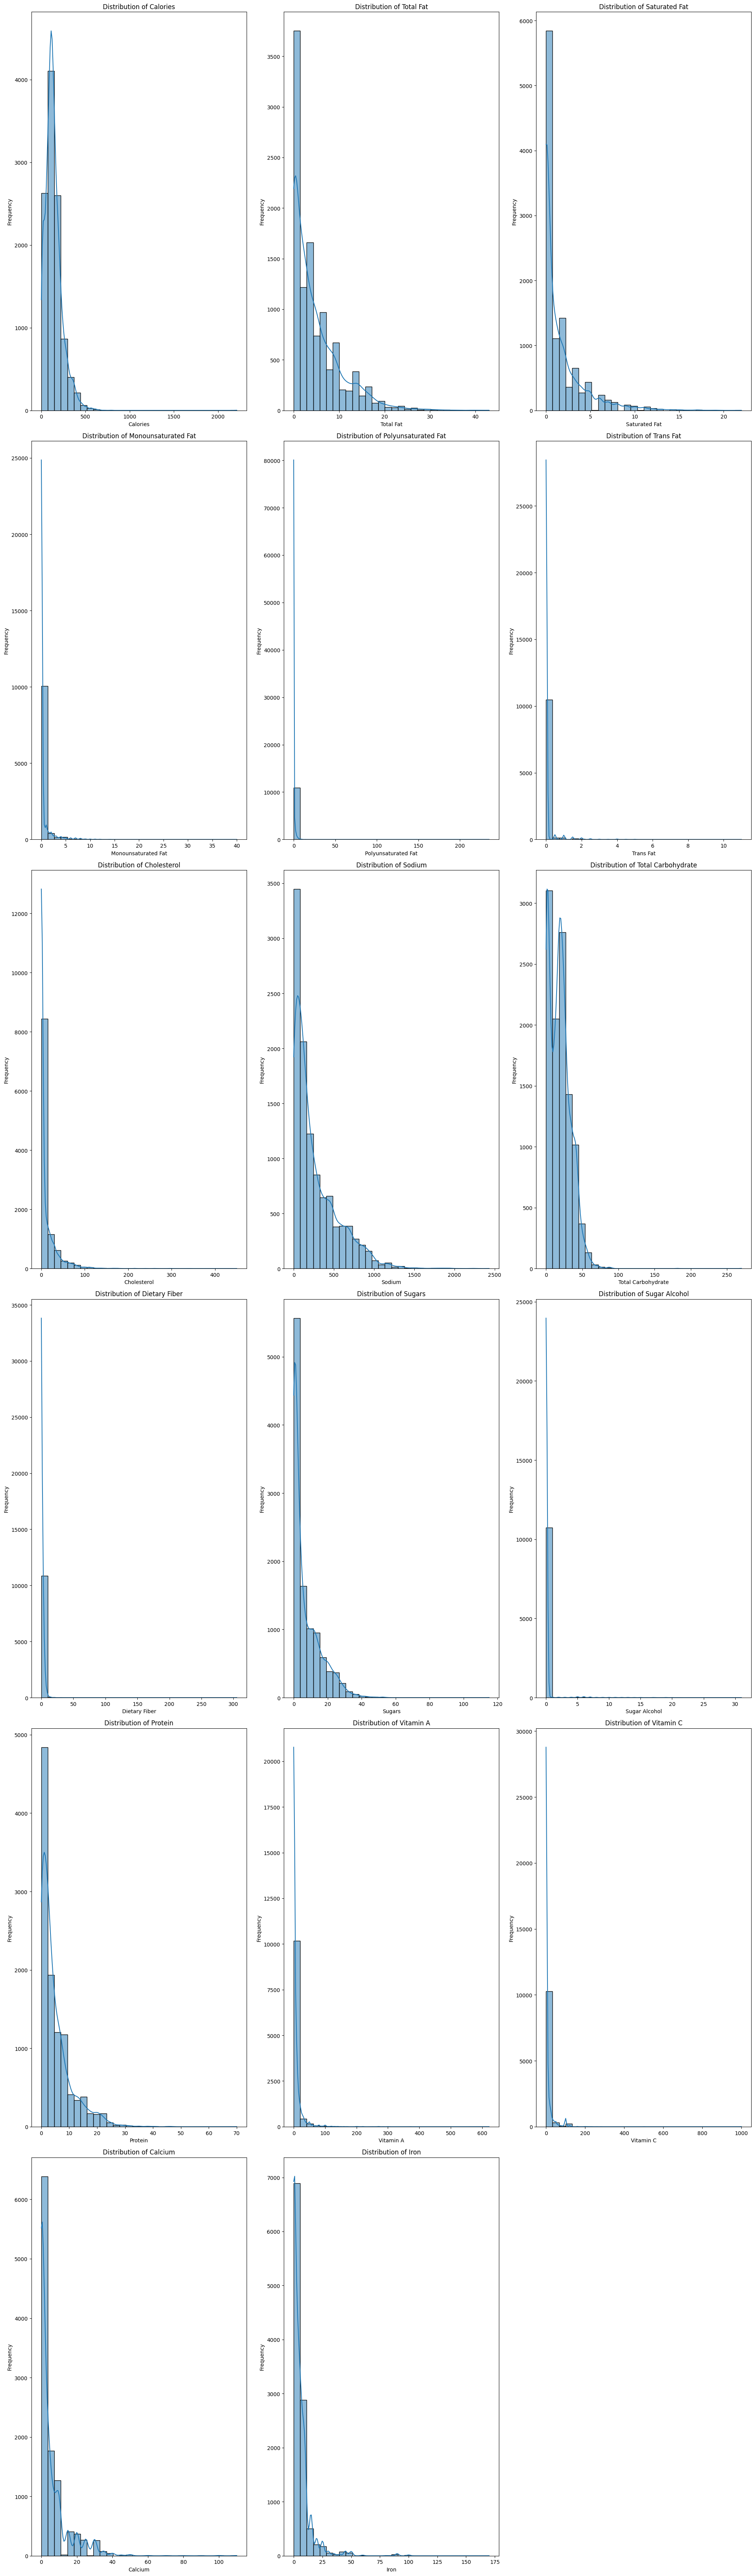

In [19]:
X = food_df.drop(columns='class')

pd.set_option("mode.use_inf_as_na", True)
# distribution of each numerical feature
plt.figure(figsize=(20, len(X.columns) * 4))
for i, col in enumerate(X.columns):
    plt.subplot(len(X.columns) // 3 + 1, 3, i + 1)
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Applying Log Transformation

In [20]:
X_log = X.copy()
X_log = X_log.apply(lambda col: np.log1p(col))

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

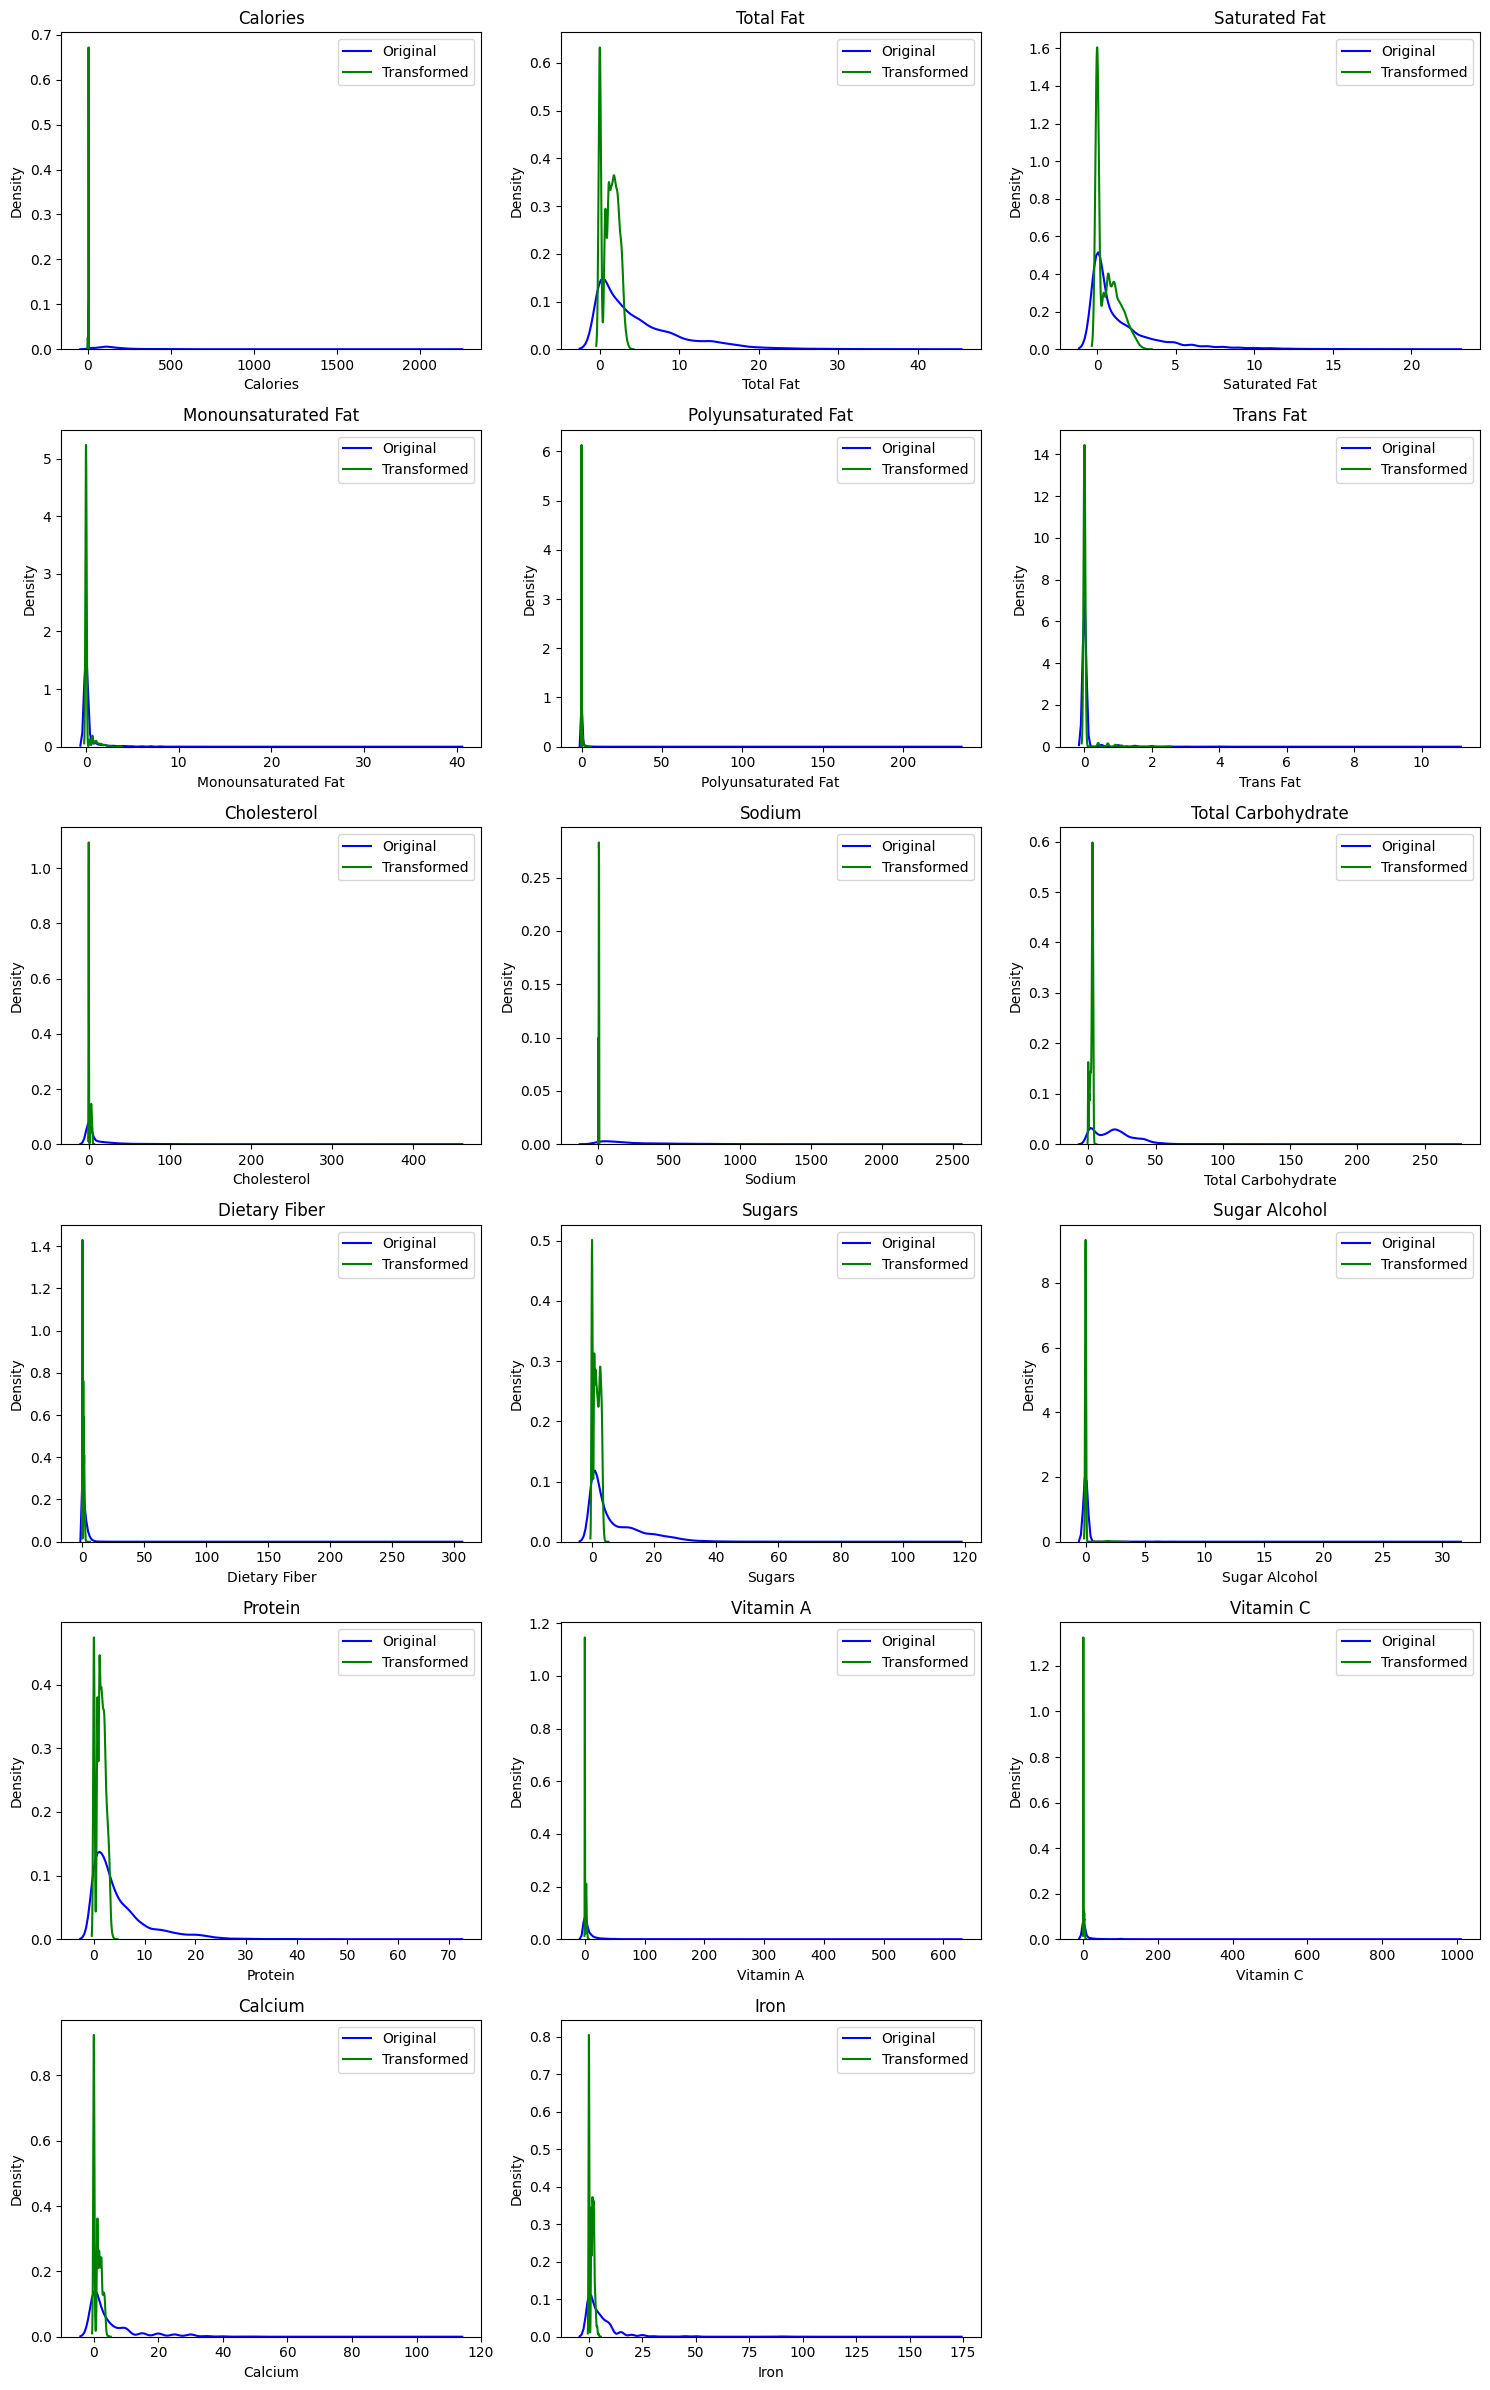

In [21]:
# Comparing before and after log transformation
def compare_distribution(original, transformed, features, n_cols=3):
    n_rows = (len(features) + n_cols - 1) // n_cols
    plt.figure(figsize=(n_cols * 5, n_rows * 4))

    for i, col in enumerate(features):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.kdeplot(original[col], label='Original', color='blue')
        sns.kdeplot(transformed[col], label='Transformed', color='green')
        plt.title(f"{col}")
        plt.legend()

    plt.tight_layout()
    plt.show()

compare_distribution(X, X_log, X.columns)

### Target Encoding

In [22]:
X = food_df.drop(columns='class')
y = food_df['class']

In [23]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

In [24]:
# observe mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", label_mapping)

Class Mapping: {"'In Moderation'": 0, "'Less Often'": 1, "'More Often'": 2}


### Data Splitting

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state=41, stratify=y_encoded)

### Preprocessing Pipeline

In [26]:
log_transformer = FunctionTransformer(np.log1p, validate=True)

pipeline = Pipeline([
    ('log', log_transformer),
    ('scaler', StandardScaler())
])

X_train_scaled = pipeline.fit_transform(X_train)

# transforming X_test
X_test_scaled = pipeline.transform(X_test)


In [27]:
print(f"Training dataset shape, X_train: {X_train_scaled.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (8735, 17), y_train: (8735,)


In [28]:
print(f"Testing dataset shape, X_test: {X_test_scaled.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (2184, 17), y_test: (2184,)


# Multinomial Logistic Regression

#### 1. Without Regularization

In [29]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

clf.fit(X_train_scaled, y_train)

# predcitions
y_pred = clf.predict(X_test_scaled)

In [30]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [31]:
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.7893772893772893,
 'recall': array([0.80714958, 0.78304743, 0.69230769]),
 'precision': array([0.77366997, 0.80665281, 0.79646018]),
 'f1score': array([0.79005525, 0.79467486, 0.74074074])}

In [32]:
cf = confusion_matrix(y_test, y_pred)

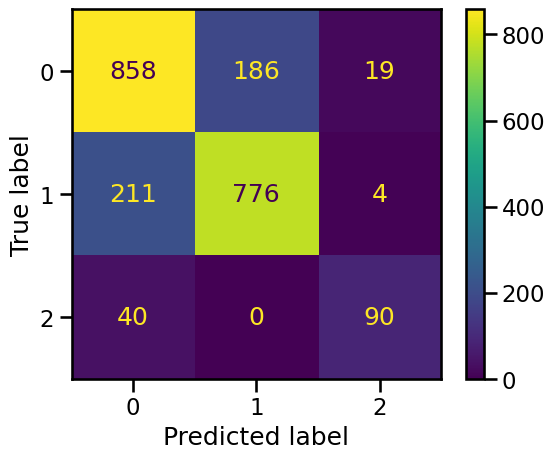

In [33]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=clf.classes_)
disp.plot()
plt.show()

In [34]:
food_df['class'].value_counts(normalize=True)

class
'In Moderation'    0.486858
'Less Often'       0.453521
'More Often'       0.059621
Name: proportion, dtype: float64

### Features Importance

In [35]:
clf.coef_

array([[-0.11947235,  0.63695864, -0.3584879 ,  0.16756371,  0.40228903,
        -0.19618338,  0.35884878,  0.03286785,  0.68422816,  0.31766876,
        -0.25692857, -0.07500661,  0.39756511,  0.00946038, -0.12066284,
        -0.01217995, -0.07000617],
       [ 0.57068945,  0.82998351,  1.23632648,  0.17847658,  0.25751693,
        -0.11697005,  0.47013966, -0.05308192,  0.69043156, -0.36243505,
         0.29246462,  0.05467136, -0.23582749, -0.1569522 ,  0.01716376,
        -0.03911   , -0.02441889],
       [-0.4512171 , -1.46694215, -0.87783858, -0.34604029, -0.65980596,
         0.31315344, -0.82898845,  0.02021407, -1.37465972,  0.0447663 ,
        -0.03553604,  0.02033524, -0.16173763,  0.14749183,  0.10349908,
         0.05128995,  0.09442506]])

#### The `coef_` is a coefficients list with three elements, one element is the actual coefficent for class 0, 1, 2.
- To better analyze the coefficients, use three utility methods to sort and visualize them.

In [36]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# visualizing coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

#### Coefficients for Classes

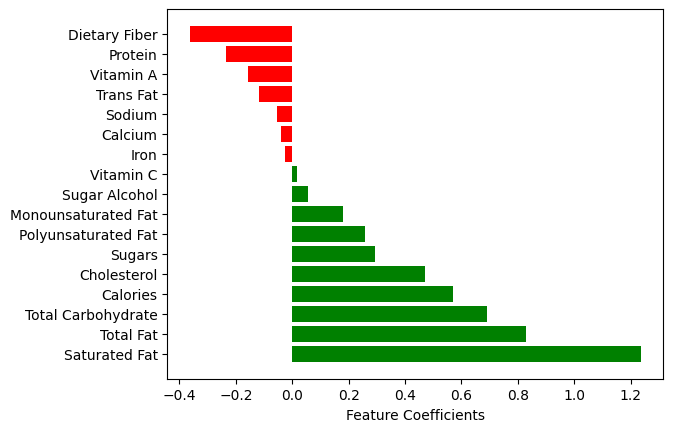

In [37]:
# coefficents for Class 1, `Less Often`
coef_dict = get_feature_coefs(clf, 1, feature_cols)
visualize_coefs(coef_dict)

#### Unhealthy nutrients such as `Saturated Fat`, `Sugars`, `Cholesterol`, `Total Fat`, other fats., have high positive coefficients.
- Food items containing unhealthy nutrients will have **higher coeficients** and will be more likely to be categorized in the 'Less Often' class.

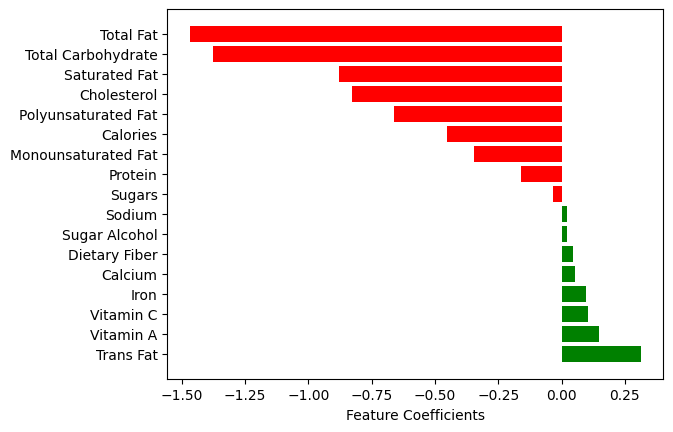

In [38]:
# coefficents for Class 2, `More Often` ==> healthiest options
coef_dict = get_feature_coefs(clf, 2, feature_cols)
visualize_coefs(coef_dict)

#### 2.  `L1-Regularized` Multinomial Logistic Regression

In [39]:
l2_model = LogisticRegression(
    penalty='l2',
    multi_class='multinomial',
    solver='lbfgs',  # works with l2
    C=0.01,            # inverse of regularization strength (lambda)
    random_state=42, 
    max_iter=1000
)
l2_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_l2 = l2_model.predict(X_test_scaled)

In [40]:
evaluate_metrics(y_test, y_pred_l2)

{'accuracy': 0.7861721611721612,
 'recall': array([0.81091251, 0.78506559, 0.59230769]),
 'precision': array([0.76690391, 0.80538302, 0.81914894]),
 'f1score': array([0.78829447, 0.79509453, 0.6875    ])}

In [41]:
print(classification_report(y_test, y_pred_l2, target_names=label_encoder.classes_))

                 precision    recall  f1-score   support

'In Moderation'       0.77      0.81      0.79      1063
   'Less Often'       0.81      0.79      0.80       991
   'More Often'       0.82      0.59      0.69       130

       accuracy                           0.79      2184
      macro avg       0.80      0.73      0.76      2184
   weighted avg       0.79      0.79      0.79      2184



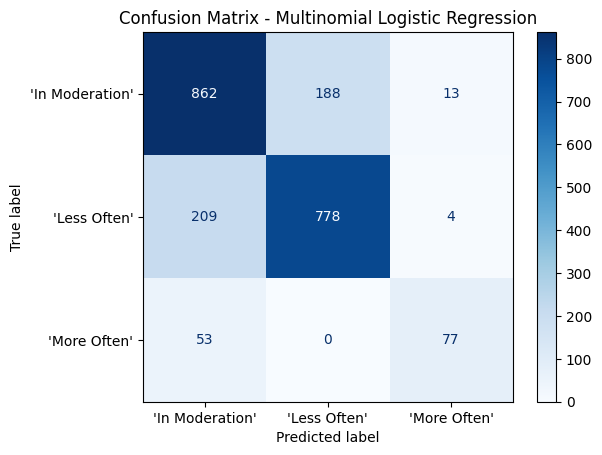

In [42]:
cm = confusion_matrix(y_test, y_pred_l2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Multinomial Logistic Regression")
plt.show()

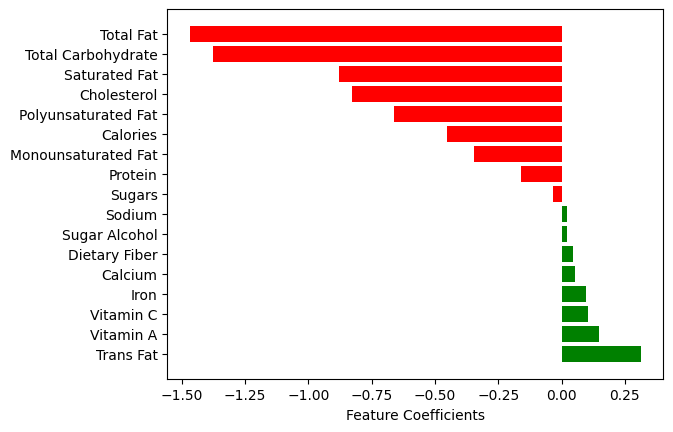

In [43]:
# coefficents for Class 1, `Less Often`
coef_dict = get_feature_coefs(clf, 2, feature_cols)
visualize_coefs(coef_dict)

#### 3.  `L1-Regularized` Multinomial Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

l1_model = LogisticRegression(
    penalty='l1',
    solver='saga',               
    multi_class='multinomial',   
    C=0.01,                      
    max_iter=5000,              
    random_state=42
)

l1_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, max_iter=5000, multi_class='multinomial',
                   penalty='l1', random_state=42, solver='saga')

In [45]:
y_pred_l1 = l1_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print(classification_report(y_test, y_pred_l1, target_names=label_encoder.classes_))

Accuracy: 0.782967032967033
                 precision    recall  f1-score   support

'In Moderation'       0.76      0.81      0.79      1063
   'Less Often'       0.81      0.78      0.79       991
   'More Often'       0.81      0.55      0.65       130

       accuracy                           0.78      2184
      macro avg       0.79      0.71      0.74      2184
   weighted avg       0.78      0.78      0.78      2184



In [46]:
# Which features are used
# non-zero coefficients per class
nonzero_counts = np.sum(l1_model.coef_ != 0, axis=1)
print("Number of non-zero coefficients per class:", nonzero_counts)

Number of non-zero coefficients per class: [5 7 1]


In [47]:
feature_names = X_train.columns  # list of original feature names
coefs = l1_model.coef_           # shape: (n_classes, n_features)

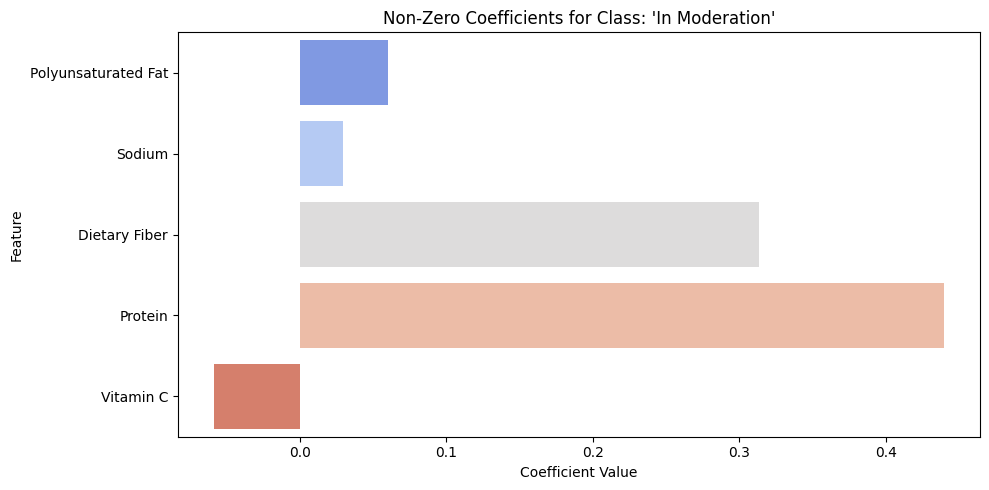

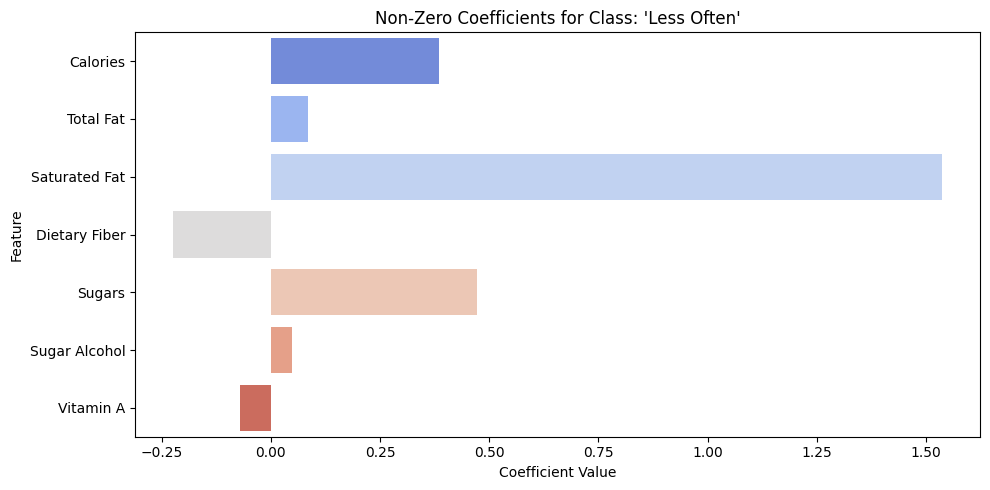

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


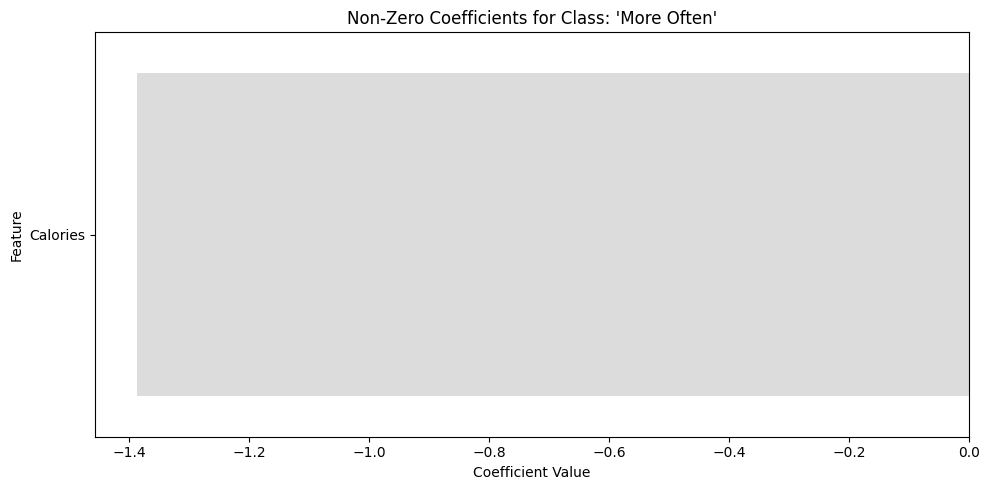

In [48]:
#class labels (e.g., 'In Moderation', 'Less Often', 'More Often')
class_labels = label_encoder.classes_

# loop over each class
for i, class_label in enumerate(class_labels):
    coef_i = coefs[i]
    nonzero_mask = coef_i != 0
    selected_features = feature_names[nonzero_mask]
    selected_coefs = coef_i[nonzero_mask]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')
    plt.title(f"Non-Zero Coefficients for Class: {class_label}")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()